# Covid-19 Virus Data Review (Full Report)
## New Method to enhance evaluation Moving Averages when weekly data repeats, but daily data sources vary.

### Description of the Problem and Discussion of the Background

Timely and accurate trend information has been important to every individual throughout the current global pandemic.  We all need to know whether things are getting better or worse, whether to hunker down or go out, when we can expect to return to normalcy, and whether we can trust what our politicians to tell us the truth about things.<br><br>
Johns Hopkins University began tracking the Covid-19 virus early on. Daily data has been available through their COVID-19 Dashboard, shown below. The image shown is dated 9/27/2020, 1:26 am CST.

![](img/100.png)

Of interest in this study are the daily report graphics, highlighted in the graphics below. Of particular note is the saw-tooth pattern rather than the typically smooth data we might expect from consistent large data. A general 7-day pattern particularly emerges, which is likely due to the frequency and timeliness of data made available. The individual weekday data cannot truly be said to be as different as apples and oranges. However, they graphc shows that they are more akin to different varieties of apples from one day to the next, and repeated weekly. This pattern appears in all of the Daily graphs. Regardless of region or statistic the same patter emerges.

The most recent source Information, Links and Terms of Use are available from their referenced Repository in [GitHub.](https://github.com/CSSEGISandData/COVID-19.git)

![](img/120.png)

In general a 7-day Moving Average might smooth this data. However, the change from one day to the next seems significant enough that it might become it difficult to discern the actual trend in the virus, whether dynamically increasing, inflecting or decreasing.

This study considers a method to score the COVID-19 trending data through "voting moving averages" over the current and preceeding 7 days to gain an predictive index which can better indicate the dynamic trend.

The discussion thus far has focused upon Global Daily Cases. For purposes of this study, a subset is used, which focuses upon Texas Daily Cases. Although this narrows down the source information significantly, it is clear in the following that the same 7-day pattern prevails, but appears worse, as illustrated in he following graph from 9/27/2020 10:40 PM. The Texas plot illustrates how difficult it may be to determine from one day to the next whether they are winning the fight; ie: new cases are declining.

![](img/200.png)

### Description of the Data and How it is to be Used to Solve the Problem.

Global US data is to be downloaded directly from Johns Hopkins, to a Dataframe. It will be scrubbed leaving only the pertinent information relating to Texas Daily Cases.

The revised dataset will be considered to contain information from an undefined subset of the whole source list.  However, there is little value in identifying the specific sources, as it is considered that the appropriate sources are sampled over various days. No assumption is made as to the specific time, day, or date of the individual source samplings, and though there may be an assumption that most of the individual data is generally sampled from one week to the next. The writer believes this may be sufficient periodicity to significantly smooth the data for good result. 

For example, considering a simple up (positive), down (negative), even (unchanging) average scoring system:
 - suppose in the past week that all seven dynamic moving averages concluded positive slopes. This would be a strong indicator of increasing daily new cases. 
 - Likewise, seven negative dynamic moving averages would strongly indicate a reducing number of new cases. 
 - A mixed, but smoothly transitioning result, though less strong, might contain some useful trend information especially if comparison with previous dates could be shown to support the predicted transition.  In this case, previous analyses may help validate the predicted trend, and might do so with some signicant reliability given the increased number of data points contributed by the previous week(s).
 - Least helpful, and indicating only uncertainty is a mixed result lacking any trend. Such a result would clearly contribute less overall trending information, either up or down or steady.

An improvement to the above may be a normalized numerical average. This scheme will be reviewed as well.

As the premise of this approach is that weekday sources change, what we are really saying is that Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, and Saturday data are each different from each other as apples, oranges, bananas, ... etc. That is to say that if they were all apples then a moving average analysis would be sufficient. Review of the patterns in the graph indicate that they are not all "apples."

Because of this variety normalized and proportionalized data may yield to KNN analysis, demonstrating the degree to which the week day data varies.

Ultimately, the overall data will be treated to Moving Average analysis, and its trend will be compared to that of the Dynamic Moving Average analysis. 

### Link to Project Notebook in Github Repository containing Code

### Data and Analysis

In [8]:
# IMPORT PACKAGES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set
import matplotlib.ticker as ticker

import matplotlib.dates as mdates


In [9]:
# IMPORT CONFIRMED US CASES FROM GIT (JOHNS HOPKINS DATA) AND READ TO A MASTER DATAFILE
url_confirmed_US="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
# REDUCE THE DATAFILES TO INCLUDE USA AND TEXAS INFORMATION
confirmed_US=pd.read_csv(url_confirmed_US)
confirmed_TX=confirmed_US.loc[confirmed_US['Province_State'] == "Texas"]
# SCRUB IRRELEVENT COLUMNS TO SIMPLIFY TO VERSIONS A & B
#   A IS TO BE MAINTAIN SPECIFIC SOURCE DATA & B IS TO CONTAIN ONLY NUMERIC DATA.
confirmed_US_A=confirmed_US.drop(['UID','iso2','iso3','Province_State','code3','FIPS','Country_Region','Lat','Long_','Combined_Key'],axis=1)
confirmed_US_B=confirmed_US_A.drop(['Admin2'],axis=1)
confirmed_TX_A=confirmed_TX.drop(['UID','iso2','iso3','Province_State','code3','FIPS','Country_Region','Lat','Long_','Combined_Key'],axis=1)
confirmed_TX_B=confirmed_TX_A.drop(['Admin2'],axis=1)
# DEVELOP DAILY CUMULATIVE SUM DATA
confirmed_US_cumulative_sum=confirmed_US_B.sum(axis=0)
confirmed_TX_cumulative_sum=confirmed_TX_B.sum(axis=0)
# CONVERT CUMULATIVE DATA TO DIFFERENTIAL DATA
confirmed_US_daily_sum=confirmed_US_cumulative_sum.diff().fillna(confirmed_US_cumulative_sum)
confirmed_TX_daily_sum=confirmed_TX_cumulative_sum.diff().fillna(confirmed_TX_cumulative_sum)
# DEVELOP DATAFRAME FOR DYNAMIC DATA ANALYSIS BY WEEKDAYS
# US
US_daily_sum_df_x=pd.DataFrame(data=confirmed_US_daily_sum)
US_daily_sum_df=US_daily_sum_df_x.reset_index()
US_daily_sum_df.columns = ['Date', 'Confirmed']
US_daily_sum_df['Date']=pd.to_datetime(US_daily_sum_df.Date)
x=US_daily_sum_df['Date'].dt.day_name()
z=US_daily_sum_df['Date'].dt.month_name()
US_daily_sum_df.insert(loc=1,column='Day',value=x, allow_duplicates=False)
US_daily_sum_df.insert(loc=1,column='Month',value=z, allow_duplicates=False)
# TEXAS
TX_daily_sum_df_x=pd.DataFrame(data=confirmed_TX_daily_sum)
TX_daily_sum_df=TX_daily_sum_df_x.reset_index()
TX_daily_sum_df.columns = ['Date', 'Confirmed']
TX_daily_sum_df['Date']=pd.to_datetime(TX_daily_sum_df.Date) 
x=TX_daily_sum_df['Date'].dt.day_name()
TX_daily_sum_df.insert(loc=1,column='Day',value=x, allow_duplicates=False)
TX=US_daily_sum_df['Date'].dt.month_name()
TX_daily_sum_df.insert(loc=1,column='Month',value=z, allow_duplicates=False)

In [10]:
confirmed_US_daily_sum.head()

1/22/20    1.0
1/23/20    0.0
1/24/20    1.0
1/25/20    0.0
1/26/20    3.0
dtype: float64

AxesSubplot(0.125,0.125;0.775x0.775)


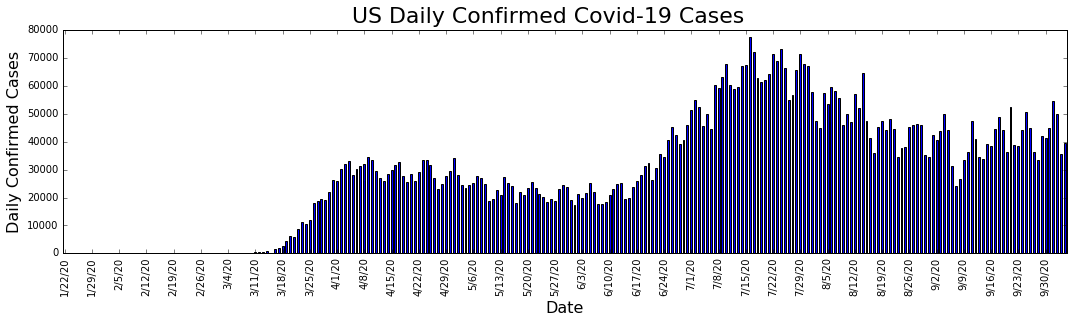

In [11]:
# PLOT DIFFERENTIAL US DATA FOR REVIEW
dat1=confirmed_US_daily_sum
n=7
ax=dat1.plot(kind='bar',y='Confirmed',figsize=(18,4))
plt.suptitle('US Daily Confirmed Covid-19 Cases',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Daily Confirmed Cases',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
print(ax)

AxesSubplot(0.125,0.125;0.775x0.775)


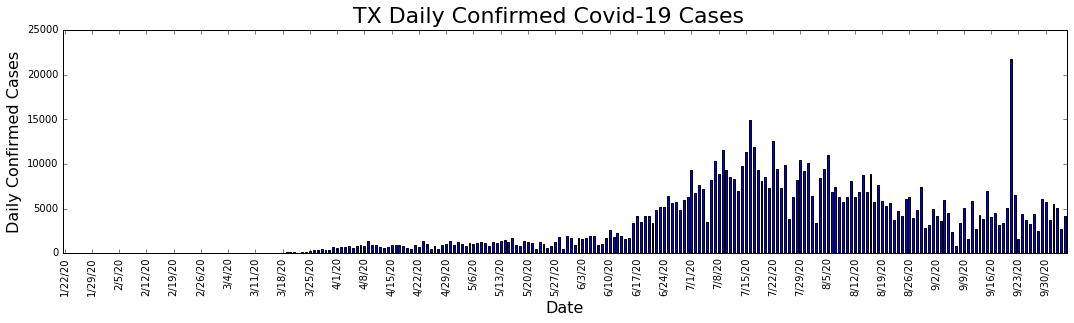

In [12]:
# PLOT DIFFERENTIAL TX DATA FOR REVIEW
dat1=confirmed_TX_daily_sum
n=7
ax=dat1.plot(kind='bar',y='Confirmed',figsize=(18,4))
plt.suptitle('TX Daily Confirmed Covid-19 Cases',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Daily Confirmed Cases',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
print(ax)

In [5]:
# DEVELOP 7-DAY MOVING SLOPES
# BREAK THE DATA INTO INDIVIDUAL DAILY DATAFRAMES FOR ANALYSIS
# US
US_x_sunday = US_daily_sum_df.loc[US_daily_sum_df['Day'] == 'Sunday']
US_x_monday = US_daily_sum_df.loc[US_daily_sum_df['Day'] == 'Monday']
US_x_tuesday = US_daily_sum_df.loc[US_daily_sum_df['Day'] == 'Tuesday']
US_x_wednesday = US_daily_sum_df.loc[US_daily_sum_df['Day'] == 'Wednesday']
US_x_thursday = US_daily_sum_df.loc[US_daily_sum_df['Day'] == 'Thursday']
US_x_friday = US_daily_sum_df.loc[US_daily_sum_df['Day'] == 'Friday']
US_x_saturday = US_daily_sum_df.loc[US_daily_sum_df['Day'] == 'Saturday']
# TX
TX_x_sunday = TX_daily_sum_df.loc[TX_daily_sum_df['Day'] == 'Sunday']
TX_x_monday = TX_daily_sum_df.loc[TX_daily_sum_df['Day'] == 'Monday']
TX_x_tuesday = TX_daily_sum_df.loc[TX_daily_sum_df['Day'] == 'Tuesday']
TX_x_wednesday = TX_daily_sum_df.loc[TX_daily_sum_df['Day'] == 'Wednesday']
TX_x_thursday = TX_daily_sum_df.loc[TX_daily_sum_df['Day'] == 'Thursday']
TX_x_friday = TX_daily_sum_df.loc[TX_daily_sum_df['Day'] == 'Friday']
TX_x_saturday = TX_daily_sum_df.loc[TX_daily_sum_df['Day'] == 'Saturday']
# DEVELOP SLOPES
# US
US_y_sunday = US_x_sunday['Confirmed'].diff().fillna(US_x_sunday['Confirmed'])/7
US_y_monday = US_x_monday['Confirmed'].diff().fillna(US_x_monday['Confirmed'])/7
US_y_tuesday = US_x_tuesday['Confirmed'].diff().fillna(US_x_tuesday['Confirmed'])/7
US_y_wednesday = US_x_wednesday['Confirmed'].diff().fillna(US_x_wednesday['Confirmed'])/7
US_y_thursday = US_x_thursday['Confirmed'].diff().fillna(US_x_thursday['Confirmed'])/7
US_y_friday = US_x_friday['Confirmed'].diff().fillna(US_x_friday['Confirmed'])/7
US_y_saturday = US_x_saturday['Confirmed'].diff().fillna(US_x_saturday['Confirmed'])/7
# TX
TX_y_sunday = TX_x_sunday['Confirmed'].diff().fillna(TX_x_sunday['Confirmed'])/7
TX_y_monday = TX_x_monday['Confirmed'].diff().fillna(TX_x_monday['Confirmed'])/7
TX_y_tuesday = TX_x_tuesday['Confirmed'].diff().fillna(TX_x_tuesday['Confirmed'])/7
TX_y_wednesday = TX_x_wednesday['Confirmed'].diff().fillna(TX_x_wednesday['Confirmed'])/7
TX_y_thursday = TX_x_thursday['Confirmed'].diff().fillna(TX_x_thursday['Confirmed'])/7
TX_y_friday = TX_x_friday['Confirmed'].diff().fillna(TX_x_friday['Confirmed'])/7
TX_y_saturday = TX_x_saturday['Confirmed'].diff().fillna(TX_x_saturday['Confirmed'])/7
# RECOMBINE THE DATA AS A SINGLE DATAFRAME
# US
US_weekly_slopes=US_y_thursday
US_weekly_slopes=US_weekly_slopes.append(US_y_friday, ignore_index=False)
US_weekly_slopes=US_weekly_slopes.append(US_y_saturday, ignore_index=False)
US_weekly_slopes=US_weekly_slopes.append(US_y_sunday, ignore_index=False)
US_weekly_slopes=US_weekly_slopes.append(US_y_monday, ignore_index=False)
US_weekly_slopes=US_weekly_slopes.append(US_y_tuesday, ignore_index=False)
US_weekly_slopes=US_weekly_slopes.append(US_y_wednesday, ignore_index=False)
US_weekly_slopes=US_weekly_slopes.sort_index()
US_weekly_slopesx=US_daily_sum_df.insert(loc=4,column='Slope',value=US_weekly_slopes, allow_duplicates=False)
# TX
TX_weekly_slopes=TX_y_thursday
TX_weekly_slopes=TX_weekly_slopes.append(TX_y_friday, ignore_index=False)
TX_weekly_slopes=TX_weekly_slopes.append(TX_y_saturday, ignore_index=False)
TX_weekly_slopes=TX_weekly_slopes.append(TX_y_sunday, ignore_index=False)
TX_weekly_slopes=TX_weekly_slopes.append(TX_y_monday, ignore_index=False)
TX_weekly_slopes=TX_weekly_slopes.append(TX_y_tuesday, ignore_index=False)
TX_weekly_slopes=TX_weekly_slopes.append(TX_y_wednesday, ignore_index=False)
TX_weekly_slopes=TX_weekly_slopes.sort_index()
US_weekly_slopesx=US_daily_sum_df.insert(loc=4,column='Slope',value=TX_weekly_slopes, allow_duplicates=False)

ValueError: cannot insert Slope, already exists

AxesSubplot(0.125,0.125;0.775x0.775)


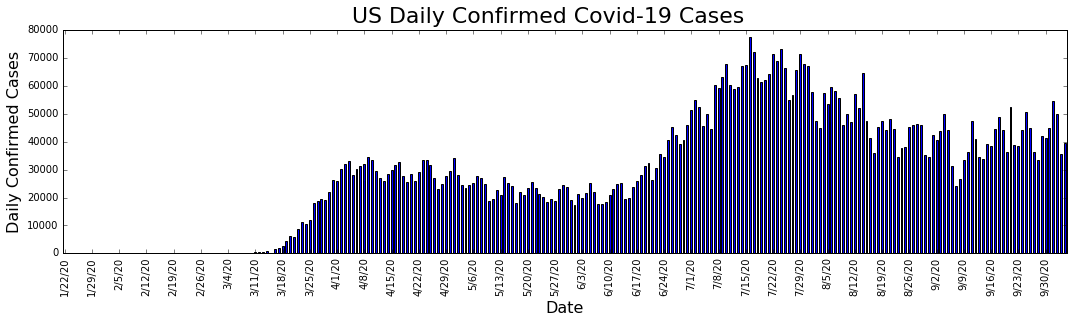

In [11]:
# PLOT DIFFERENTIAL US DATA FOR REVIEW
dat1=confirmed_US_daily_sum
n=7
ax=dat1.plot(kind='bar',y='Confirmed',figsize=(18,4))
plt.suptitle('US Daily Confirmed Covid-19 Cases',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Daily Confirmed Cases',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
print(ax)

In [18]:
TX_daily_sum_df


,Date,Month,Day,Confirmed
0,2020-01-22,January,Wednesday,0.0
1,2020-01-23,January,Thursday,0.0
2,2020-01-24,January,Friday,0.0
3,2020-01-25,January,Saturday,0.0
4,2020-01-26,January,Sunday,0.0
...,...,...,...,...
253,2020-10-01,October,Thursday,3717.0
254,2020-10-02,October,Friday,5570.0
255,2020-10-03,October,Saturday,5119.0
256,2020-10-04,October,Sunday,2769.0


In [ ]:
# PLOT US WEEKDAY SLOPE DATA FOR REVIEW
dat1=US_weekly_slopes
n=7
ax=dat1.plot(kind='bar',y='Confirmed',figsize=(18,4))
plt.suptitle('US Weekly Slopes',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Daily Confirmed Cases',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
print(ax)

In [ ]:
# PLOT US WEEKDAY SLOPE DATA FOR REVIEW
dat1=TX_weekly_slopes
n=7
ax=dat1.plot(kind='bar',y='Confirmed',figsize=(18,4))
plt.suptitle('TX Weekly Slopes',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Daily Confirmed Cases',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
print(ax)

In [ ]:
US_df3 = pd.DataFrame(US_weekly_slopes)
US_df3.plot.bar(figsize=(18,10),grid=True,legend=False)

In [ ]:
TX_df4 = pd.DataFrame(TX_weekly_slopes)
TX_df4.plot.bar(figsize=(18,10),grid=True,legend=False)

In [ ]:
### Methodology

In [ ]:
### Results

In [ ]:
### Discussion

In [ ]:
### Conclusion

In [ ]:
### Link to Presentation

### Link to Full Report

To be completed as part of Week 2 assgnment.

### Credit:

The above described analyses, along with any errors or omissions, shall be deemed to be the responsibility of the writer, Mark Brantana,who offers his thanks and credits for the terrific dataset and great humanitarian service offered by Johns Hopkins University, as follows:

The data set is licensed under the Creative Commons Attribution 4.0 International (CC BY 4.0) by the Johns Hopkins University on behalf of its Center for Systems Science in Engineering. Copyright Johns Hopkins University 2020.

Attribute the data as the "COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University" or "JHU CSSE COVID-19 Data" for short, and the url: https://github.com/CSSEGISandData/COVID-19.

For publications that use the data, please cite the following publication: "Dong E, Du H, Gardner L. An interactive web-based dashboard to track COVID-19 in real time. Lancet Inf Dis. 20(5):533-534. doi: 10.1016/S1473-3099(20)30120-1"

### Appendix 1 Source List as of Writing

### DATA SOURCES:
This list includes a complete list of all sources ever used in the data set, since January 21, 2010. Some sources listed here (e.g., WHO, ECDC, US CDC, BNO News) are not currently relied upon as a source of data.

- Aggregated data sources:
  - World Health Organization (WHO): https://www.who.int/
  - European Centre for Disease Prevention and Control (ECDC): https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases 
  - DXY.cn. Pneumonia. 2020. http://3g.dxy.cn/newh5/view/pneumonia
  - US CDC: https://www.cdc.gov/coronavirus/2019-ncov/index.html
  - BNO News: https://bnonews.com/index.php/2020/02/the-latest-coronavirus-cases/
  - WorldoMeters: https://www.worldometers.info/coronavirus/  
  - 1Point3Arces: https://coronavirus.1point3acres.com/en  
  - COVID Tracking Project: https://covidtracking.com/data. (US Testing and Hospitalization Data. We use the maximum reported value from "Currently" and "Cumulative" Hospitalized for our hospitalization number reported for each state.)
  - Los Angeles Times: https://www.latimes.com/projects/california-coronavirus-cases-tracking-outbreak/
  - The Mercury News: https://www.mercurynews.com/tag/coronavirus/

- US data sources at the state (Admin1) or county/city (Admin2) level:  
  - Washington State Department of Health: https://www.doh.wa.gov/emergencies/coronavirus
  - Maryland Department of Health: https://coronavirus.maryland.gov/
  - New York State Department of Health: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e/data
  - New York City Health Department: https://www1.nyc.gov/site/doh/covid/covid-19-data.page
  - NYC Department of Health and Mental Hygiene: https://www1.nyc.gov/site/doh/covid/covid-19-data.page and https://github.com/nychealth/coronavirus-data
  - Florida Department of Health Dashboard: https://services1.arcgis.com/CY1LXxl9zlJeBuRZ/arcgis/rest/services/Florida_COVID19_Cases/FeatureServer/0
    and https://fdoh.maps.arcgis.com/apps/opsdashboard/index.html#/8d0de33f260d444c852a615dc7837c86
  - Colorado: https://covid19.colorado.gov/covid-19-data
  - Virginia: https://www.vdh.virginia.gov/coronavirus/
  - Northern Mariana Islands CNMI Department of Public Health: https://cnmichcc.maps.arcgis.com/apps/opsdashboard/index.html#/4061b674fc964efe84f7774b7979d2b5
  - Missouri Department of Health: https://www.arcgis.com/apps/MapSeries/index.html?appid=8e01a5d8d8bd4b4f85add006f9e14a9d
  - Missouri: Nodaway County: https://www.nodawaypublichealth.org/
  - St. Louis City Department of Health: https://www.stlouis-mo.gov/covid-19/data/#totalsByDate
  - St. Louis County: https://stlcorona.com/resources/covid-19-statistics1/
  - Massachusetts: https://www.mass.gov/info-details/covid-19-response-reporting
  - Michigan: https://www.michigan.gov/coronavirus/0,9753,7-406-98163_98173---,00.html 
  - Illinois Department of Public Health: https://dph.illinois.gov/covid19
  - Indiana State Department of Health: https://hub.mph.in.gov/dataset?q=COVID
  - Connecticut Department of Public Health: https://data.ct.gov/stories/s/COVID-19-data/wa3g-tfvc/
  - Ohio Department of Health: https://coronavirus.ohio.gov/wps/portal/gov/covid-19/home
  - Oregon Office of Emergency Management: https://experience.arcgis.com/experience/fff9f83827c5461583cd014fdf4587de
  - Tennessee Department of Health: https://www.tn.gov/health/cedep/ncov.html
  - Rhode Island Department of Health: https://ri-department-of-health-covid-19-data-rihealth.hub.arcgis.com/
  - Wisconsin Department of Health Services: https://www.dhs.wisconsin.gov/covid-19/data.htm
  - North Carolina City of Greenville GIS: https://www.arcgis.com/apps/opsdashboard/index.html#/7aeac695cafa4065ba1505b1cfa72747
  - Iowa State Government: https://coronavirus.iowa.gov/
  - Minnesota Department of Health: https://www.health.state.mn.us/diseases/coronavirus/situation.html
  - Alabama Public Health: https://www.alabamapublichealth.gov/covid19/
  - Mississippi State Department of Health: https://msdh.ms.gov/msdhsite/_static/14,0,420.html
  - Nebraska Department of Health and Human Services: https://experience.arcgis.com/experience/ece0db09da4d4ca68252c3967aa1e9dd
  - South Carolina Department of Health and Environmental Control: https://scdhec.gov/infectious-diseases/viruses/coronavirus-disease-2019-covid-19/sc-testing-data-projections-covid-19
  - Nevada Department of Health and Human Services: https://nvhealthresponse.nv.gov/
  - New Jersey Department of Health: https://covid19.nj.gov/
  - Delaware Emergency Management Agency: https://coronavirus.delaware.gov/
  - Utah Department of Health: https://coronavirus-dashboard.utah.gov/#overview
  - Arizona Emergency Support Function (ESF)/Recovery Support Function (RSF) Operations Dashboard: https://www.arcgis.com/apps/MapSeries/index.html?appid=62e6bfa682a34e6aae9d9255ac865467
  - Departamento de Salud, Puerto Rico: https://bioseguridad.maps.arcgis.com/apps/opsdashboard/index.html#/d7308c1abb4747e584329adf1215125e
  - Arkansas Department of Health: https://experience.arcgis.com/experience/c2ef4a4fcbe5458fbf2e48a21e4fece9
  - Maine Department of Health and Human Services: https://www.maine.gov/dhhs/mecdc/infectious-disease/epi/airborne/coronavirus/data.shtml
  - Pennsylvania Department of Health: https://www.health.pa.gov/topics/disease/coronavirus/Pages/Cases.aspx
  - City of Philadelphia: https://www.phila.gov/programs/coronavirus-disease-2019-covid-19/
  - Lancaster County: https://covid-19-lancastercountypa.hub.arcgis.com/
  - Chester County: https://chesco.maps.arcgis.com/apps/opsdashboard/index.html#/975082d579454c3ca7877db0a44e61ca
  - Louisiana Department of Health: http://ldh.la.gov/coronavirus/
  - Government of The District of Columbia: https://coronavirus.dc.gov/page/coronavirus-data 
  - North Dakota Department of Health: https://www.health.nd.gov/diseases-conditions/coronavirus/north-dakota-coronavirus-cases
  - Oklahoma State Department of Health: https://looker-dashboards.ok.gov/embed/dashboards/44
  - Guam Department of Public Health and Social Services: http://dphss.guam.gov/covid-19/ 
  - New Mexico Department of Health: https://cvprovider.nmhealth.org/public-dashboard.html
  - Kentucky Department of Public Health: https://kygeonet.maps.arcgis.com/apps/opsdashboard/index.html#/543ac64bc40445918cf8bc34dc40e334
  - Georgia Department of Public Health: https://dph.georgia.gov/covid-19-daily-status-report
  - State of Hawai'i Department of Health: https://health.hawaii.gov/coronavirusdisease2019/what-you-should-know/current-situation-in-hawaii/
  - Reno County Health Department: http://reno.maps.arcgis.com/apps/opsdashboard/index.html#/dfaef27aede1414b89abf393b2ccb994
  - Texas Department of State Health Services: https://dshs.texas.gov/coronavirus/
  - Texas: City of San Antonio: https://covid19.sanantonio.gov/Home
  - Texas: Brazioria County: https://www.brazoriacountytx.gov/departments/health-department/brazoria-county-coronavirus-map
  - Texas: Brazos County Health District: http://www.brazoshealth.org
  - Texas: Cameron County Public Health: https://www.cameroncounty.us/publichealth/index.php/coronavirus/
  - Texas: Collin County: https://www.collincountytx.gov/healthcare_services/Pages/news.aspx
  - Texas: Dallas County: https://www.dallascounty.org/departments/dchhs/2019-novel-coronavirus.php
  - Texas: Denton County: https://gis-covid19-dentoncounty.hub.arcgis.com/pages/covid-19cases
  - Texas: Ector County:  http://www.co.ector.tx.us/page/ector.CoronavirusCOVID19
  - Texas: City of El Paso: http://epstrong.org/results.php
  - Texas: Fayette County: https://www.co.fayette.tx.us/
  - Texas: Fort Bend County Health & Human Services: https://www.fbchealth.org/ncov/
  - Texas: Galveston County Health District: https://www.gchd.org/about-us/news-and-events/coronavirus-disease-2019-covid-19/galveston-county-confirmed-covid-19-cases
  - Texas: Harris County: https://publichealth.harriscountytx.gov/Resources/2019-Novel-Coronavirus
  - Texas: Hays County: https://hayscountytx.com/covid-19-information-for-hays-county-residents/
  - Texas: Hidalgo County Health and Human Services: https://www.hidalgocounty.us/2630/Coronavirus-Updates
  - Texas: Midland County: https://www.midlandtexas.gov/955/Coronavirus-COVID-19
  - Texas: Montgomery County: https://coronavirus-response-moco.hub.arcgis.com/
  - Texas: City of Corpus Christi: https://www.cctexas.com/coronavirus
  - Texas: Amarillo Public Health Department: https://covid-data-amarillo.hub.arcgis.com/
  - Texas: Tarrant County Public Health: https://www.tarrantcounty.com/en/public-health/disease-control---prevention/coronaviruas.html
  - Texas: City of Mount Pleasant: https://www.mpcity.net/632/COVID-19-UPDATES
  - Texas: City of San Angelo: https://www.cosatx.us/departments-services/health-services/coronavirus-covid-19#ad-image-0
  - Texas: San Angelo Standard-Times: https://www.gosanangelo.com/
  - Texas: Travis County: https://www.traviscountytx.gov/news/2020/1945-novel-coronavirus-covid-19-information
  - Texas: City of Laredo: https://www.cityoflaredo.com/coronavirus/
  - Texas: Williamson County & Cities Health District: http://www.wcchd.org/COVID-19/dashboard.php
  - California Department of Publich Health: https://www.cdph.ca.gov/covid19
  - California: Mariposa County: https://www.mariposacounty.org/1592/COVID-19-Information
  - California: Alameda County Public Health Department: https://covid-19.acgov.org/
  - California: Fresno County Public Health Department: https://www.co.fresno.ca.us/departments/public-health/covid-19
  - California: Humboldt County: https://humboldtgov.org/
  - California: Madera County: https://www.maderacounty.com/government/public-health/corona-virus-covid-19/covid-revised
  - California: Marin County Health & Human Services: https://coronavirus.marinhhs.org/
  - California: Orange County Health Care Agency: https://occovid19.ochealthinfo.com/coronavirus-in-oc
  - California: Placer County: https://www.placer.ca.gov/coronavirus
  - California: Riverside County: https://www.rivcoph.org/coronavirus
  - California: Sacramento County: https://www.saccounty.net/COVID-19/
  - California: San Francisco Department of Public Helath: https://www.sfdph.org/dph/alerts/coronavirus.asp
  - California: San Benito County Health & Human Services: https://hhsa.cosb.us/publichealth/communicable-disease/coronavirus/
  - California: San Joaquin County Public Health Services: http://www.sjcphs.org/coronavirus.aspx
  - California: San Mateo County: https://www.smchealth.org/coronavirus
  - California: Santa Cruz County Health Services Agency: http://www.santacruzhealth.org/HSAHome/HSADivisions/PublicHealth/CommunicableDiseaseControl/CoronavirusHome.aspx
  - California: Shasta County: https://www.co.shasta.ca.us/covid-19/overview
  - California: Solano County: https://www.co.shasta.ca.us/covid-19/overview
  - California: Sonoma County: https://socoemergency.org/emergency/novel-coronavirus/coronavirus-cases/
  - California: Stanislaus County Health Services Agency: http://schsa.org/publichealth/pages/corona-virus/
  - California: Ventura County: https://www.venturacountyrecovers.org/
  - California: Yolo County: https://www.yolocounty.org/health-human-services/adults/communicable-disease-investigation-and-control/novel-coronavirus-2019/
  - California: Los Angeles County: http://publichealth.lacounty.gov/media/coronavirus/
  - California: San Diego County: https://www.sandiegocounty.gov/coronavirus.html
  - California: Santa Clara County: https://www.sccgov.org/sites/covid19/
  - California: Imperial County Public Health Department: http://www.icphd.org/health-information-and-resources/healthy-facts/covid-19/
  - California: San Bernardino County: https://sbcovid19.com/
  - Montana Department of Public Health and Human Services: https://dphhs.mt.gov/publichealth/cdepi/diseases/coronavirusmt
  - South Dakota Department of Health: https://doh.sd.gov/news/coronavirus.aspx
  - Wyoming Department of Health: https://health.wyo.gov/publichealth/infectious-disease-epidemiology-unit/disease/novel-coronavirus/
  - New Hampshire Department of Health and Human Services: https://www.nh.gov/covid19/dashboard/summary.htm
  - Idaho Government: https://coronavirus.idaho.gov/
  - Virgin Islands Department of Health: https://www.covid19usvi.com/
  - Vermont Department of Health: https://www.healthvermont.gov/response/coronavirus-covid-19/current-activity-vermont

  
- Non-US data sources at the country/region (Admin0) or state/province (Admin1) level:
  - National Health Commission of the People’s Republic of China (NHC):
    http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml
  - China CDC (CCDC): http://weekly.chinacdc.cn/news/TrackingtheEpidemic.htm
  - Hong Kong Department of Health: https://www.chp.gov.hk/en/features/102465.html
  - Macau Government: https://www.ssm.gov.mo/portal/
  - Taiwan CDC: https://sites.google.com/cdc.gov.tw/2019ncov/taiwan?authuser=0
  - Government of Canada: https://www.canada.ca/en/public-health/services/diseases/coronavirus.html
  - Australia Government Department of Health: https://www.health.gov.au/news/coronavirus-update-at-a-glance
  - COVID Live (Australia): https://www.covidlive.com.au/
  - Ministry of Health Singapore (MOH): https://www.moh.gov.sg/covid-19
  - Italy Ministry of Health: http://www.salute.gov.it/nuovocoronavirus
  - Dati COVID-19 Italia (Italy): https://github.com/pcm-dpc/COVID-19/tree/master/dati-regioni
  - French Government: https://dashboard.covid19.data.gouv.fr/ and https://github.com/opencovid19-fr/data/blob/master/dist/chiffres-cles.json
  - OpenCOVID19 France: https://github.com/opencovid19-fr
  - Palestine (West Bank and Gaza): https://corona.ps/details
  - Israel: https://govextra.gov.il/ministry-of-health/corona/corona-virus/
  - Ministry of Health, Republic of Kosovo: https://kosova.health/ and https://covidks.s3.amazonaws.com/data.json
  - Berliner Morgenpost (Germany): https://interaktiv.morgenpost.de/corona-virus-karte-infektionen-deutschland-weltweit/
  - rtve (Spain): https://www.rtve.es/noticias/20200514/mapa-del-coronavirus-espana/2004681.shtml
  - Ministry of Health, Republic of Serbia: https://covid19.rs/homepage-english/ 
  - Chile: https://www.minsal.cl/nuevo-coronavirus-2019-ncov/casos-confirmados-en-chile-covid-19/
  - Chile: https://www.gob.cl/coronavirus/cifrasoficiales/
  - Brazil Ministry of Health: https://covid.saude.gov.br/
  - Brazil: https://github.com/wcota/covid19br. Data described in [DOI: 10.1590/SciELOPreprints.362](https://doi.org/10.1590/SciELOPreprints.362)
  - Gobierono De Mexico:https://covid19.sinave.gob.mx/
  - Japan COVID-19 Coronavirus Tracker: https://covid19japan.com/#all-prefectures
  - Monitoreo del COVID-19 en Perú -  Policía Nacional del Perú (PNP) - Dirección de Inteligencia (DIRIN): https://www.arcgis.com/apps/opsdashboard/index.html#/f90a7a87af2548699d6e7bb72f5547c2 and Ministerio de Salud del Perú: https://covid19.minsa.gob.pe/sala_situacional.asp
  - Colombia National Institute of Health: http://www.ins.gov.co/Noticias/Paginas/Coronavirus.aspx
  - Russia: https://xn--80aesfpebagmfblc0a.xn--p1ai/information/
  - Ukraine: https://covid19.rnbo.gov.ua/
  - Public Health Agency of Sweden: https://experience.arcgis.com/experience/09f821667ce64bf7be6f9f87457ed9aa
  - Government of India: https://www.mygov.in/covid-19
  - Government of Pakistan: http://covid.gov.pk/stats/pakistan
  - The UK Government: https://coronavirus.data.gov.uk/#category=nations&map=rate
  - Scottish Government: https://www.gov.scot/publications/coronavirus-covid-19-trends-in-daily-data/
  - Netherlands National Institute for Health and Environment: https://experience.arcgis.com/experience/ea064047519040469acb8da05c0f100d
  - Iceland Directorate of Health and Department of Civil Protection and Emergency Management: https://www.covid.is/data
  - Luxembourg Government Ministry of Health: https://msan.gouvernement.lu/en/graphiques-evolution.html
